In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

In [6]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [7]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##Data Preprocessing

In [8]:
data.shape

(7920, 3)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

##Text Preprocessing

In [11]:
import re
import string

In [12]:
data['tweet'].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [13]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [15]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [16]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctution

In [17]:
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [18]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [19]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [20]:
data['tweet'] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [21]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [27]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 798.4 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 798.4 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 771.0 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 771.0 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 702.6 kB/s  0:00:02

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ----

In [22]:
import nltk

In [23]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [25]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [26]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [27]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [30]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [31]:
data['tweet'].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [32]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [56]:
from collections import Counter
vocab = Counter()

In [57]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [58]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [59]:
len(vocab)

15949

In [60]:
data.shape

(7920, 3)

In [61]:
tokens =[key for key in vocab if vocab[key]>10]

In [62]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [63]:
len(tokens)

1145

In [64]:
def save_vocabulary(lines, filename):
    data = '\n'. join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

### Divide dataset

In [66]:
x = data['tweet']
y = data['label']

In [67]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [68]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [69]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.7 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.7 MB 1.7 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.7 MB 1.7 MB/s eta 0:00:05
   --------- ------------------------------ 2.1/8.7 MB 1.9 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.7 MB 2.0 MB/s eta 0:00:04
   -------------- ------------------------- 3.1/8.7 MB 2.0 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.7 MB 2.1 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 2.1 MB/s eta 0:00:03
   --------------------- ------------------ 4.7/8.7 MB 2.1 MB/s eta 0:00:02
   ------------------------ --------------- 5.2/8.7 MB 2.1 MB/s eta 0:00:02
   -----------------------

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [78]:
x_train.shape

(6336,)

In [80]:
x_test.shape

(1584,)

In [81]:
y_train.shape

(6336,)

In [82]:
y_test.shape

(1584,)

In [83]:
x_test

1646    deven work appl fill cinnamon appl waffl thank...
781     post goodi ——‘ tomorrow cours afford price pla...
4961    wish happi hanumanjayanti hd wallpap appstor l...
908     true realtalk girltalk heartbreak true truth q...
3541    paraguaypanth haha pc mac galaxi iphoneipad us...
                              ...                        
1550    white beauti irresist thank secretfriend shop ...
1130    thee bullet mizz suewe sharingiscar onelov ame...
3418    black blue fun birthday restaur food sushi goo...
3966    samsung galaxi plu smgu unlock gb purpl w free...
5496    wait till get new phone gssuck alreadi use dat...
Name: tweet, Length: 1584, dtype: object

In [84]:
x_train

6081    imrecessionista ahh opposit zune pc desktop wi...
3439    first tri perfect girl appl red purpl orang ye...
1601    nokia sirocco unlock mobil phone florida money...
4532    taken xperiac selfi moment u xperia myxperia x...
7594    three page homework drain thank appl rock jk d...
                              ...                        
2156            got new iphon happi appl iphon iphoneteam
7753    appl sue stop sale galaxi want remind kid beg ...
3563    charleston church shooter dylann… news photogr...
1319    hey guy look motorolanexusxtfactori money toda...
5037    beatssuck charg power beat get gym work appl beat
Name: tweet, Length: 6336, dtype: object

### Vectoization

In [117]:
def vectrorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_lst.append(sentence_list)

    vectorized_lst_new = np.asanyarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [118]:
vectrorized_x_train = vectrorizer(x_train,tokens)

In [119]:
vectrorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [120]:
vectrorized_x_test = vectrorizer(x_test,tokens)

In [121]:
vectrorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [122]:
vectrorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [123]:
y_train

6081    1
3439    0
1601    0
4532    0
7594    1
       ..
2156    0
7753    1
3563    0
1319    0
5037    1
Name: label, Length: 6336, dtype: int64

In [124]:
vectrorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [125]:
y_test

1646    0
781     0
4961    0
908     0
3541    0
       ..
1550    0
1130    0
3418    0
3966    0
5496    1
Name: label, Length: 1584, dtype: int64

In [126]:
y_train.value_counts()

label
0    4705
1    1631
Name: count, dtype: int64

In [127]:
import matplotlib.pyplot as plt

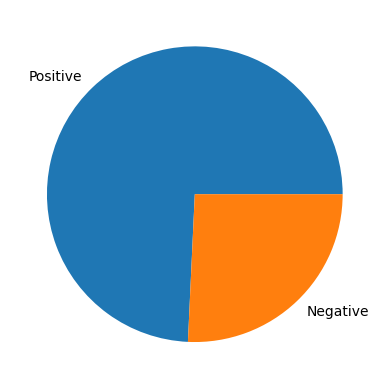

In [128]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [111]:
!pip install imbalanced-learn

In [129]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectrorized_x_train_smote, y_train_smote = smote.fit_resample(vectrorized_x_train, y_train)
print(vectrorized_x_train_smote.shape, y_train_smote.shape)

(9410, 1145) (9410,)


In [130]:
print("X shape:", vectrorized_x_train.shape)
print("y shape:", y_train.shape)


X shape: (6336, 1145)
y shape: (6336,)


In [131]:
y_train_smote.value_counts()

label
1    4705
0    4705
Name: count, dtype: int64

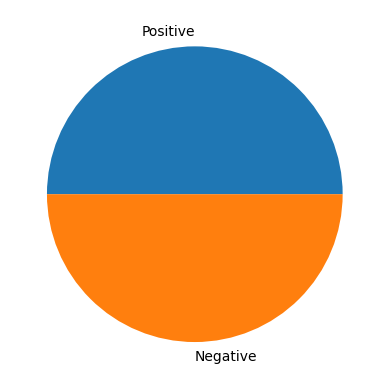

In [132]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [137]:
vectrorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9410, 1145), dtype=float32)

In [136]:
y_train_smote

0       1
1       0
2       0
3       0
4       1
       ..
9405    1
9406    1
9407    1
9408    1
9409    1
Name: label, Length: 9410, dtype: int64

In [138]:
vectrorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [139]:
y_test

1646    0
781     0
4961    0
908     0
3541    0
       ..
1550    0
1130    0
3418    0
3966    0
5496    1
Name: label, Length: 1584, dtype: int64

## Model Traninig and Evaluation

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [141]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score  

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Traning Scores:\n\tAccuracy ={acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-Score ={f1}')


def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Validation Scores:\n\tAccuracy ={acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-Score ={f1}')

### Logistic Regretion

In [142]:
lr = LogisticRegression()
lr.fit(vectrorized_x_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [143]:
y_train_pred = lr.predict(vectrorized_x_train_smote)

In [144]:
y_train_pred

array([1, 0, 0, ..., 1, 1, 1], shape=(9410,))

In [145]:
y_train_smote

0       1
1       0
2       0
3       0
4       1
       ..
9405    1
9406    1
9407    1
9408    1
9409    1
Name: label, Length: 9410, dtype: int64

In [146]:
training_scores(y_train_smote, y_train_pred)

Traning Scores:
	Accuracy =0.938
	Precision = 0.912
	Recall =0.97
	F1-Score =0.94


In [147]:
y_test_pred = lr.predict(vectrorized_x_test)

In [148]:
y_test_pred 

array([1, 0, 0, ..., 0, 0, 1], shape=(1584,))

In [149]:
y_test

1646    0
781     0
4961    0
908     0
3541    0
       ..
1550    0
1130    0
3418    0
3966    0
5496    1
Name: label, Length: 1584, dtype: int64

In [150]:
validation_scores(y_test,y_test_pred)

Validation Scores:
	Accuracy =0.876
	Precision = 0.715
	Recall =0.838
	F1-Score =0.772


### Naive Bayes

In [152]:
mnb = MultinomialNB()
mnb.fit(vectrorized_x_train_smote, y_train_smote)
y_train_pred = mnb.predict(vectrorized_x_train_smote)
y_test_pred = mnb.predict(vectrorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)


Traning Scores:
	Accuracy =0.906
	Precision = 0.866
	Recall =0.96
	F1-Score =0.911
Validation Scores:
	Accuracy =0.869
	Precision = 0.677
	Recall =0.904
	F1-Score =0.774


### Decision Tree

In [153]:
dt = DecisionTreeClassifier()
dt.fit(vectrorized_x_train_smote, y_train_smote)
y_train_pred = dt.predict(vectrorized_x_train_smote)
y_test_pred = dt.predict(vectrorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Traning Scores:
	Accuracy =1.0
	Precision = 1.0
	Recall =0.999
	F1-Score =1.0
Validation Scores:
	Accuracy =0.84
	Precision = 0.7
	Recall =0.625
	F1-Score =0.66


### Random Forest

In [154]:
rf = RandomForestClassifier()
rf.fit(vectrorized_x_train_smote, y_train_smote)
y_train_pred = rf.predict(vectrorized_x_train_smote)
y_test_pred = rf.predict(vectrorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Traning Scores:
	Accuracy =1.0
	Precision = 1.0
	Recall =0.999
	F1-Score =1.0
Validation Scores:
	Accuracy =0.875
	Precision = 0.763
	Recall =0.724
	F1-Score =0.743


### Support Vector Machine

In [155]:
svm = SVC()
svm.fit(vectrorized_x_train_smote, y_train_smote)
y_train_pred = svm.predict(vectrorized_x_train_smote)
y_test_pred = svm.predict(vectrorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Traning Scores:
	Accuracy =0.977
	Precision = 0.959
	Recall =0.995
	F1-Score =0.977
Validation Scores:
	Accuracy =0.886
	Precision = 0.754
	Recall =0.808
	F1-Score =0.78


In [157]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr, file)